<a href="https://colab.research.google.com/github/FGalvao77/Tutorial-pratico-de-Deep-Learning-com-Pytorch/blob/main/Tutorial_pr%C3%A1tico_de_Deep_Learning_com_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial prático de Deep Learning com Pytorch**

---
<br> - Aprenda a treinar e avaliar seu modelo.

  - vídeo da aula: https://www.youtube.com/watch?v=hOnrwaOWSdE

## **1) Importação das bibliotecas**

In [1]:
# importando as libs 

import numpy as np                # para modelagem matemática
import matplotlib.pyplot as plt   # para visualização gráfica

%matplotlib inline

In [3]:
# importando as funcs e libs 

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

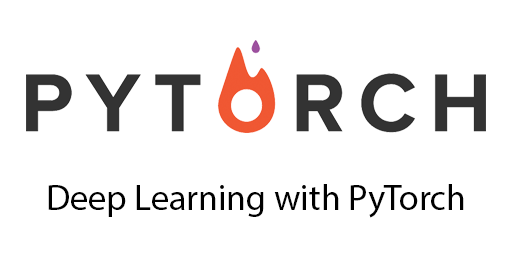

---


Site oficial:
- https://pytorch.org/

<br>Tutorial:
- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

## **2) Importação dos dados**

In [4]:
# criando um objeto para aplicação de um tensor

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))])

> Define as transformações que serão aplicadas nos dados:
 - transforma os dados em tensores e as normaliza
  - média e desvio-padrão são tuplas

In [5]:
# download dos dados de treino e de teste

train_set = datasets.FashionMNIST('~/.pytorch/F_NMIST_data/', 
                                     download = True, train = True,
                                     transform = transform)

test_set = datasets.FashionMNIST('~/.pytorch/F_NMIST_data/', 
                                     download = True, train = False,
                                     transform = transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_NMIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_NMIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_NMIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_NMIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_NMIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_NMIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_NMIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_NMIST_data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# criando o loader dos dados

train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size = 64, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(test_set, 
                                           batch_size = 64, 
                                           shuffle = True)

In [7]:
# visualizando o tamanho dos conjuntos de dados

print('train data: ', len(train_loader.sampler))
print('test data: ', len(test_loader.sampler))

train data:  60000
test data:  10000


In [8]:
# explorando os dados

data_iter = iter(train_loader)
images, labels = data_iter.next()

# visualizando informações gerais
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [32]:
datasets.MNIST

torchvision.datasets.mnist.MNIST

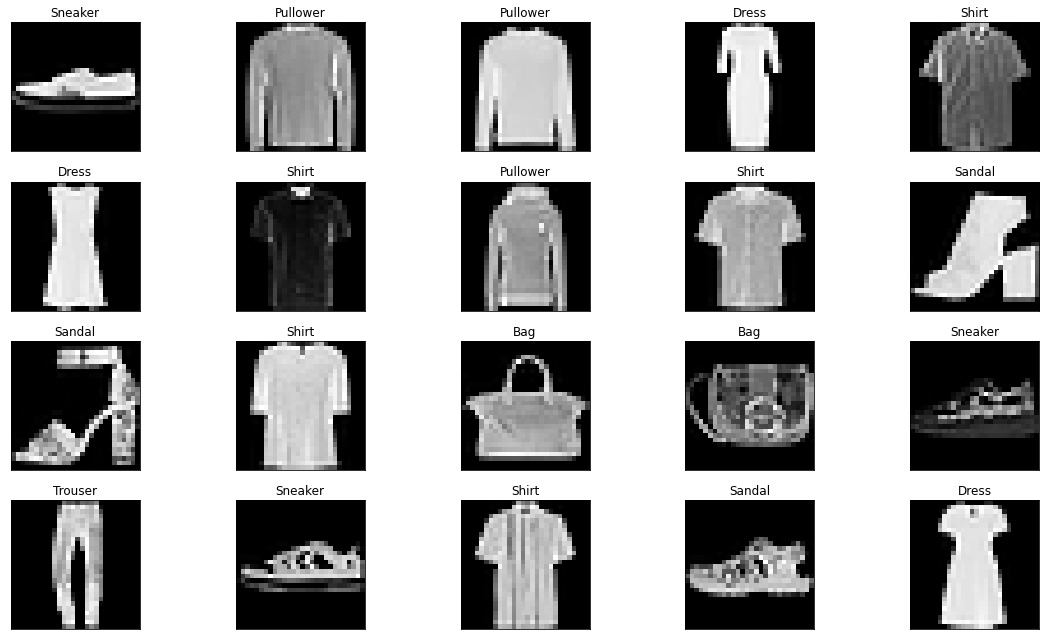

In [9]:
# visualizando as imagens

fig = plt.figure(figsize = (18, 9))
rows = 4
columns = 5

fashion_classes = {0: 'T-shirt/top',
                   1: 'Trouser',
                   2: 'Pullower', 
                   3: 'Dress', 
                   4: 'Coat', 
                   5: 'Sandal',
                   6: 'Shirt', 
                   7: 'Sneaker', 
                   8: 'Bag', 
                   9: 'Ankle boot'}

for idx in np.arange(20):
  ax = fig.add_subplot(rows, columns,
                       idx + 1, xticks = [], 
                       yticks = [])
  ax.imshow(images[idx].numpy().squeeze(), 
            cmap = 'gray')
  ax.set_title(fashion_classes[labels[idx].item()])
  fig.tight_layout()

In [10]:
# importando as libs

from torch import nn, optim
import torch.nn.functional as F

In [11]:
# criando uma funcão para aplicação das camadas de redes neurais

class Modelo(nn.Module):
  def __init__(self):
    super().__init__()
                  # entrada | saída
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), 
                      dim = 1)
    
    return x

In [12]:
# instanciando o modelo

model = Modelo()

# definindo a função LOSS e o otimizador
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr = 0.01)

In [13]:
min_validation_loss = np.inf
epochs = 15

# preparando o modelo para treinar
# model.train()
train_loss_list, validation_loss_list = [], [] # criando duas listas para armazenar os valores

for epoch in range(epochs):
  model.train()
  running_loss = 0
  validation_loss = 0
  
  # treinando o modelo
  for images, labels in train_loader:
    # treinando
    optimizer.zero_grad()
    log_probs = model(images)
    loss = criterion(log_probs, labels)
    loss.backward()
    optimizer.step() 
    running_loss += loss.item() * images.size(0)
    # running_loss += loss.item()

  model.eval()
  with torch.no_grad():
    total = 0
    correct = 0

    for images, labels in test_loader: 
      log_probs = model(images)
      loss = criterion(log_probs, labels)
      validation_loss += loss.item() * images.size(0)
      # validation_loss += loss.iter()
      max_class = torch.argmax(log_probs, dim = 1)
      total += labels.numel()
      correct += sum(max_class == labels).item()

    print('Acurácia de teste: {:.2f}%'.format(correct / total * 100))

  running_loss = running_loss / len(train_loader.sampler)
  validation_loss = validation_loss / len(test_loader.sampler)

  train_loss_list.append(running_loss)
  validation_loss_list.append(validation_loss)

  print('Epoch: {}/{}:'.format(epoch+1, epochs), 
        'Loss treino: {:.6f}...'.format(running_loss), 
        'Loss validação: {:.6f}...'.format(validation_loss))
  
  if validation_loss <= min_validation_loss:
    print('Validation loss anterior {} --> Validation loss novo {}. Salvando modelo.'.format(min_validation_loss, 
                                                                                             validation_loss))
    
    torch.save(model.state_dict(), 'modelo.pth')
    min_validation_loss = validation_loss

  print()

Acurácia de teste: 70.46%
Epoch: 1/15: Loss treino: 1.361561... Loss validação: 0.759369...
Validation loss anterior inf --> Validation loss novo 0.7593694035530091. Salvando modelo.

Acurácia de teste: 77.27%
Epoch: 2/15: Loss treino: 0.640406... Loss validação: 0.606364...
Validation loss anterior 0.7593694035530091 --> Validation loss novo 0.6063638217926025. Salvando modelo.

Acurácia de teste: 79.85%
Epoch: 3/15: Loss treino: 0.531392... Loss validação: 0.554955...
Validation loss anterior 0.6063638217926025 --> Validation loss novo 0.5549546418190002. Salvando modelo.

Acurácia de teste: 81.61%
Epoch: 4/15: Loss treino: 0.479087... Loss validação: 0.510399...
Validation loss anterior 0.5549546418190002 --> Validation loss novo 0.5103990155696869. Salvando modelo.

Acurácia de teste: 83.42%
Epoch: 5/15: Loss treino: 0.448621... Loss validação: 0.459192...
Validation loss anterior 0.5103990155696869 --> Validation loss novo 0.45919207277297974. Salvando modelo.

Acurácia de teste: 

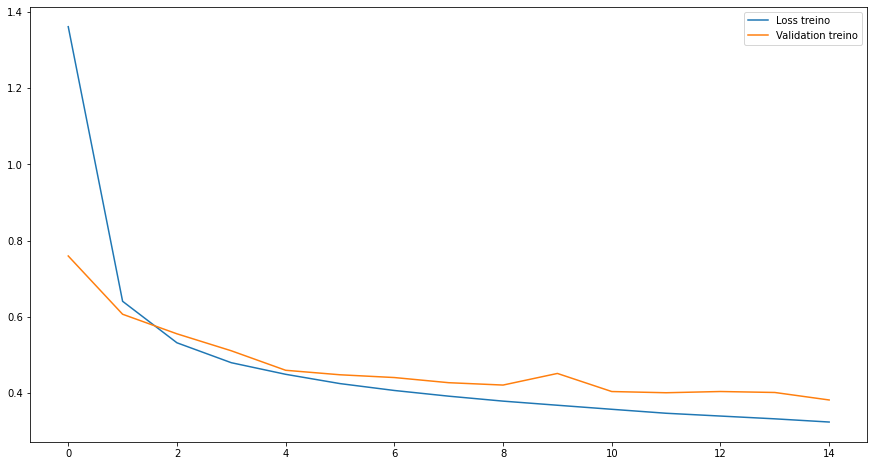

In [33]:
# plotando gráfico com os valores de loss e validation

plt.figure(figsize=(15, 8))
plt.plot(train_loss_list, label = 'Loss treino')
plt.plot(validation_loss_list, label = 'Validation treino')
plt.legend();

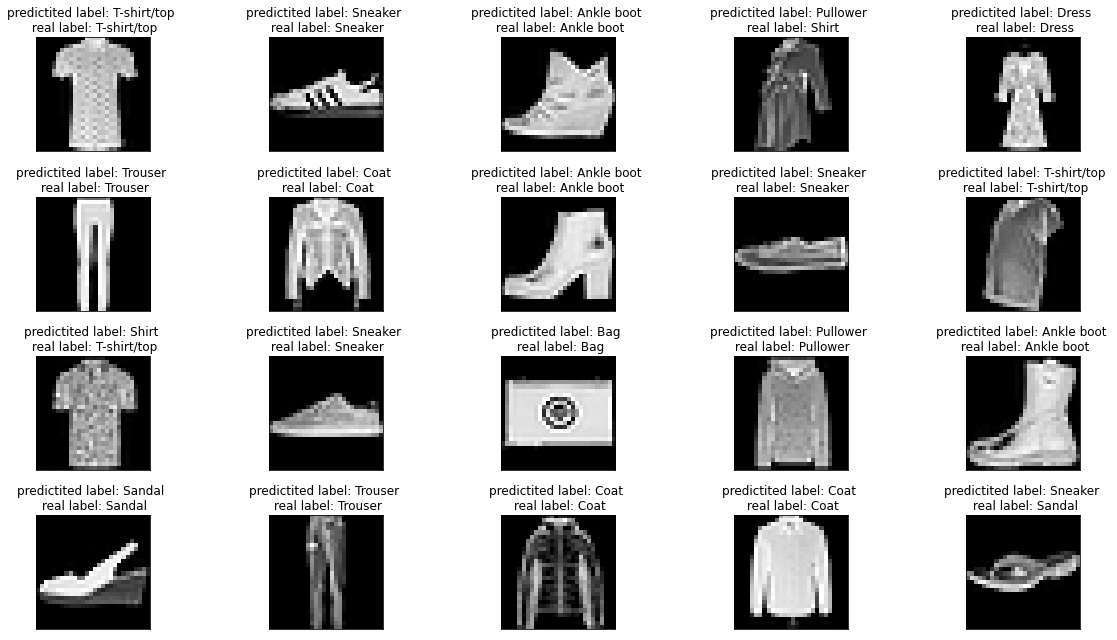

In [38]:
# verificando o resultado predito Vs real

data_iter = iter(test_loader)
images, labels = data_iter.next()
output = model(images)

fig = plt.figure(figsize=(18, 9))
rows = 4
columns = 5

_, predictions = torch.max(output, 1)
images = images.numpy()

for idx in np.arange(20):
  ax = fig.add_subplot(rows, columns, 
                       idx + 1, 
                       xticks = [], 
                       yticks = [])
  ax.imshow(np.squeeze(images[idx]), 
            cmap = 'gray')
  ax.set_title('predictited label: {} \n real label: {}'.format(fashion_classes[predictions[idx].item()], 
                                              fashion_classes[labels[idx].item()]))
  fig.tight_layout()